In [ ]:
# Project Introduction
# ----------------------------
# SCREEN TIME ANALYZER
# Author: Aneesa Alam

# This project simulates and analyzes 7 days of app usage data
# to understand digital habits.

In [ ]:
# Import Libraries
# ------------------------
# Libraries needed for data creation and visualization

import pandas as pd        # For working with data tables
import numpy as np         # For math operations
import matplotlib.pyplot as plt  # For charts
import seaborn as sns      # For prettier charts
import random              # For generating random numbers
from datetime import datetime, timedelta  # For dates and times

In [ ]:
#Generate Screen Time Data
# --------------------------------

def generate_screen_time_data():
    categories = {
        'Social Media': ['Instagram', 'Facebook', 'Twitter', 'TikTok', 'Reddit'],
        'Entertainment': ['YouTube', 'Netflix', 'Spotify', 'Twitch', 'Games'],
        'Productivity': ['VS Code', 'Google Docs', 'Excel', 'Notion', 'Calendar'],
        'Communication': ['WhatsApp', 'Messenger', 'Email', 'Zoom', 'Slack'],
        'Learning': ['Coursera', 'Duolingo', 'Medium', 'Documentation', 'Tutorials']
    }

    dates = [(datetime.now() - timedelta(days=i)).strftime('%Y-%m-%d') for i in range(6, -1, -1)]

    data = []
    for date in dates:
        day_num = datetime.strptime(date, '%Y-%m-%d').weekday()
        day_name = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'][day_num]

        for category, apps in categories.items():
            for app in apps:
                if category == 'Social Media':
                    minutes = random.randint(30, 120)
                elif category == 'Entertainment':
                    minutes = random.randint(60, 180)
                elif category == 'Productivity':
                    minutes = random.randint(60, 240)
                elif category == 'Communication':
                    minutes = random.randint(20, 90)
                else:  # Learning
                    minutes = random.randint(30, 120)

                if day_num >= 5:  # Weekend adjustment
                    minutes = int(minutes * 1.5)

                data.append({
                    'date': date,
                    'day_of_week': day_name,
                    'category': category,
                    'app': app,
                    'minutes': minutes,
                    'hours': round(minutes / 60, 2)
                })

    return pd.DataFrame(data)

# Generate dataset
df = generate_screen_time_data()

In [ ]:
# Explore the Generated Data
# ----------------------------------

# Show first and last 5 rows
df.head()
df.tail()

# Dataset info
df.shape           # rows and columns
df.columns         # column names
df.dtypes          # data types
df.isnull().sum()  # check missing values
df.describe()      # basic statistics

,minutes,hours
count,175.000000,175.000000
mean,104.742857,1.746286
std,60.826181,1.014109
min,20.000000,0.330000
25%,61.000000,1.020000
50%,87.000000,1.450000
75%,135.000000,2.250000
max,321.000000,5.350000


In [ ]:
#Calculate Basic Totals
# ------------------------------

# Total screen time
total_minutes = df['minutes'].sum()
total_hours = df['hours'].sum()

# Daily totals and averages
daily_totals = df.groupby('date')['minutes'].sum()
avg_daily_minutes = daily_totals.mean()

# Optional: show results
total_minutes, total_hours, daily_totals, avg_daily_minutes

(np.int64(18330),
 np.float64(305.6),
 date
 2026-01-07    2180
 2026-01-08    2190
 2026-01-09    2318
 2026-01-10    3965
 2026-01-11    3057
 2026-01-12    2425
 2026-01-13    2195
 Name: minutes, dtype: int64,
 np.float64(2618.5714285714284))

In [ ]:
#Analyze Time by Category
# --------------------------------

# Total and average time by category
category_totals = df.groupby('category')['minutes'].sum().sort_values(ascending=False)
category_avg = df.groupby('category')['minutes'].mean()

# Most and least used categories
most_used = category_totals.idxmax()
least_used = category_totals.idxmin()

# Optional: display results
category_totals, category_avg, most_used, least_used

(category
 Productivity     5747
 Entertainment    4751
 Learning         2928
 Social Media     2886
 Communication    2018
 Name: minutes, dtype: int64,
 category
 Communication     57.657143
 Entertainment    135.742857
 Learning          83.657143
 Productivity     164.200000
 Social Media      82.457143
 Name: minutes, dtype: float64,
 'Productivity',
 'Communication')

In [ ]:
#Analyze Individual Apps
# -------------------------------

# Total time per app
app_totals = df.groupby('app')['minutes'].sum().sort_values(ascending=False)

# Top 10 apps
top_10_apps = app_totals.head(10)

# Top app in each category
top_apps_per_category = {}
for category in df['category'].unique():
    category_data = df[df['category'] == category]
    top_app = category_data.groupby('app')['minutes'].sum().idxmax()
    top_apps_per_category[category] = top_app

# Optional: display results
app_totals, top_10_apps, top_apps_per_category


(app
 Notion           1512
 VS Code          1295
 Calendar         1064
 Excel            1047
 Twitch            978
 Netflix           974
 YouTube           961
 Games             939
 Spotify           899
 Google Docs       829
 Twitter           678
 Duolingo          656
 Facebook          627
 Medium            609
 Instagram         604
 Coursera          585
 Tutorials         542
 Documentation     536
 TikTok            519
 Messenger         466
 Reddit            458
 Slack             437
 WhatsApp          423
 Zoom              368
 Email             324
 Name: minutes, dtype: int64,
 app
 Notion         1512
 VS Code        1295
 Calendar       1064
 Excel          1047
 Twitch          978
 Netflix         974
 YouTube         961
 Games           939
 Spotify         899
 Google Docs     829
 Name: minutes, dtype: int64,
 {'Social Media': 'Twitter',
  'Entertainment': 'Twitch',
  'Productivity': 'Notion',
  'Communication': 'Messenger',
  'Learning': 'Duolingo'})

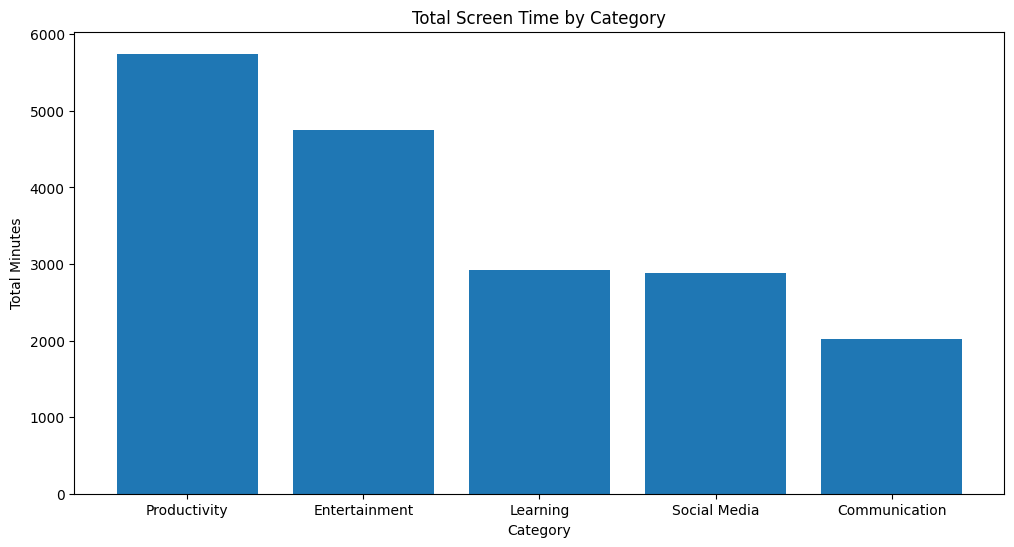

In [ ]:
#Bar Chart - Time by Category
# ------------------------------------

plt.figure(figsize=(12, 6))
plt.bar(category_totals.index, category_totals.values)
plt.title('Total Screen Time by Category')
plt.xlabel('Category')
plt.ylabel('Total Minutes')
plt.show()


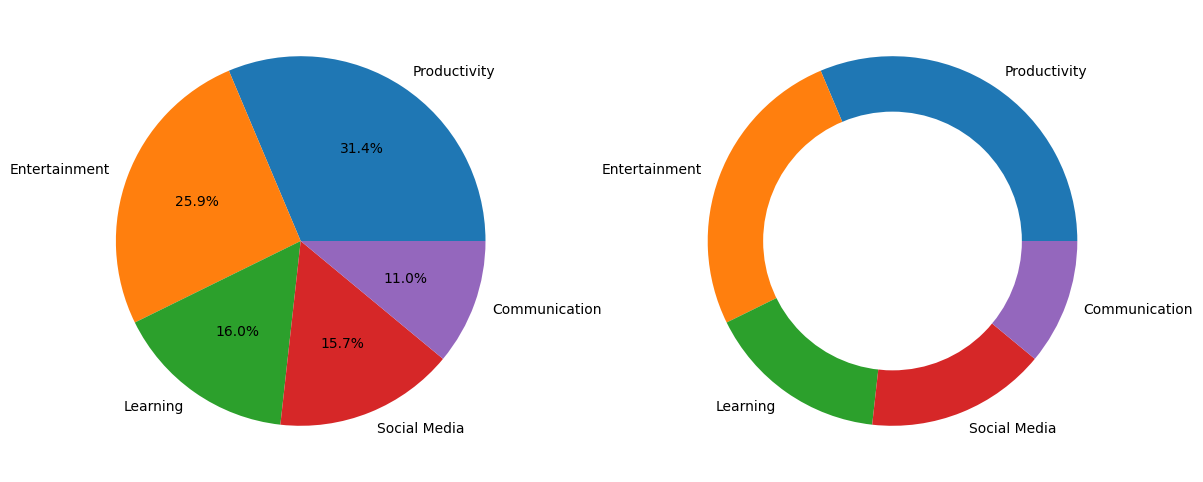

In [ ]:
#Pie Chart - Category Distribution
# -----------------------------------------

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
ax1.pie(category_totals.values, labels=category_totals.index, autopct='%1.1f%%')

# Donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.pie(category_totals.values, labels=category_totals.index)
ax2.add_artist(centre_circle)

plt.show()


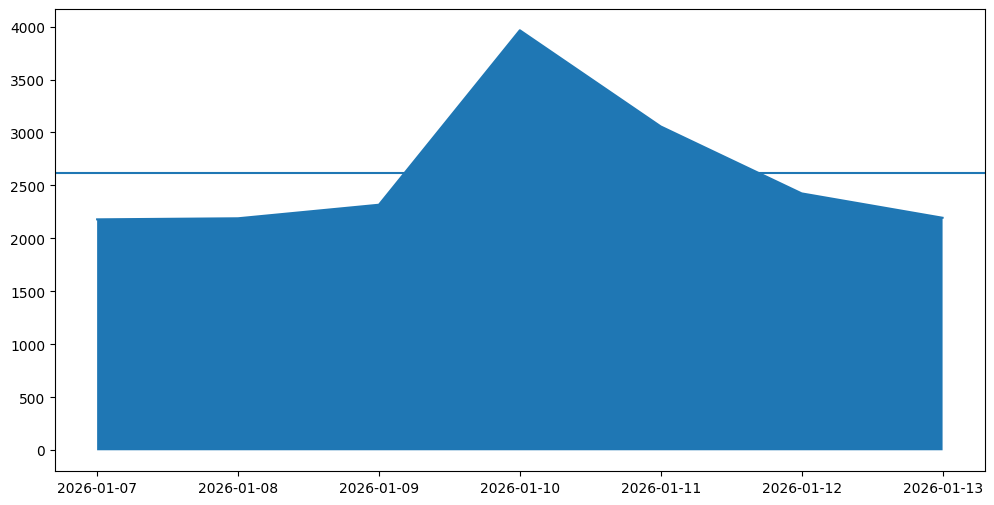

In [ ]:
#Line Chart - Daily Trends
# -----------------------------------

daily_data = df.groupby('date')['minutes'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values)
plt.fill_between(daily_data.index, daily_data.values)
plt.axhline(y=daily_data.mean())
plt.show()


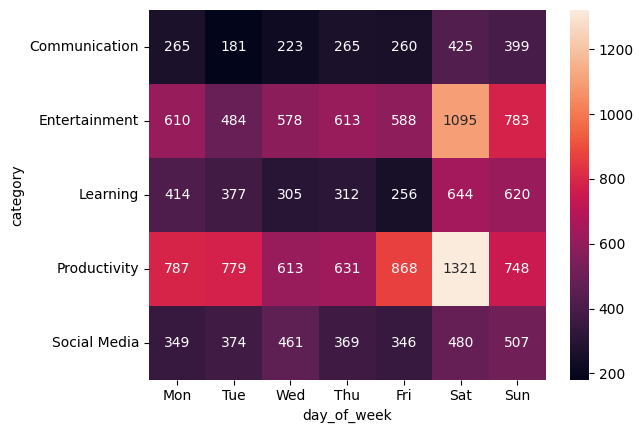

In [ ]:
#Heatmap - Activity Patterns
# ------------------------------------

heatmap_data = df.pivot_table(values='minutes', index='category', columns='day_of_week', aggfunc='sum')
heatmap_data = heatmap_data[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]

sns.heatmap(heatmap_data, annot=True, fmt='.0f')
plt.show()


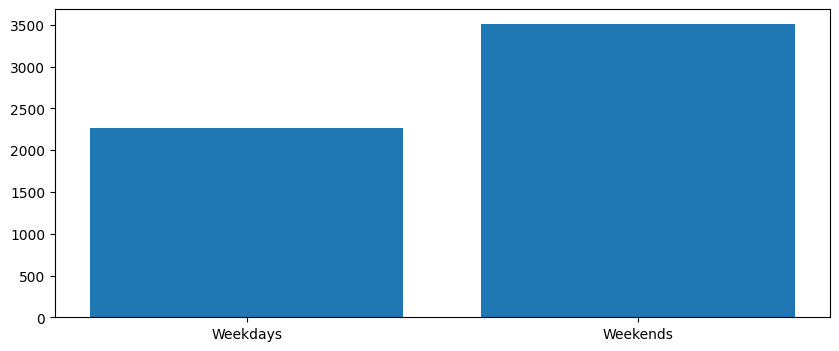

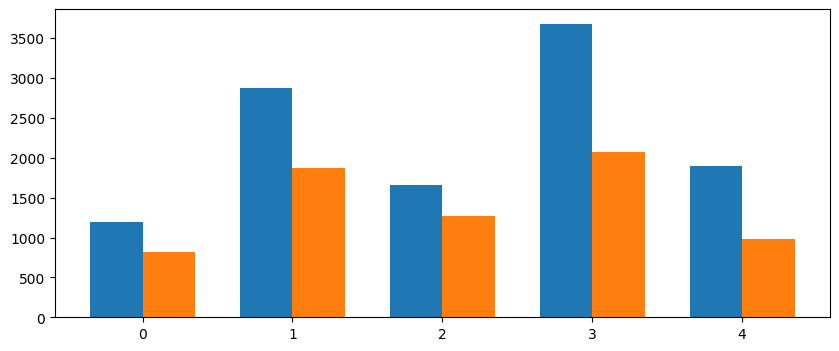

In [ ]:
#Compare Weekdays and Weekends
# ---------------------------------------

weekend_days = ['Sat', 'Sun']
weekday_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

weekend_data = df[df['day_of_week'].isin(weekend_days)]
weekday_data = df[df['day_of_week'].isin(weekday_days)]

weekend_avg = weekend_data.groupby('date')['minutes'].sum().mean()
weekday_avg = weekday_data.groupby('date')['minutes'].sum().mean()

weekend_by_category = weekend_data.groupby('category')['minutes'].sum()
weekday_by_category = weekday_data.groupby('category')['minutes'].sum()

# Visualizations
plt.figure(figsize=(10, 4))
plt.bar(['Weekdays', 'Weekends'], [weekday_avg, weekend_avg])

x = np.arange(len(weekend_by_category))
width = 0.35
plt.figure(figsize=(10, 4))
plt.bar(x - width/2, weekday_by_category.values, width)
plt.bar(x + width/2, weekend_by_category.values, width)
plt.show()

In [ ]:
#Calculate Productivity Metrics
# ---------------------------------------

productivity_weights = {
    'Productivity': 2.0,
    'Learning': 1.8,
    'Communication': 1.0,
    'Entertainment': 0.5,
    'Social Media': 0.3
}

df['weighted_minutes'] = df.apply(
    lambda row: row['minutes'] * productivity_weights[row['category']], axis=1
)

daily_scores = df.groupby('date').agg({'minutes':'sum', 'weighted_minutes':'sum'})
daily_scores['productivity_score'] = (
    daily_scores['weighted_minutes'] / daily_scores['minutes'] * 100
).round(1)

overall_score = daily_scores['productivity_score'].mean()

# Optional: display results
daily_scores, overall_score

(            minutes  weighted_minutes  productivity_score
 date                                                     
 2026-01-07     2180            2425.3               111.3
 2026-01-08     2190            2505.8               114.4
 2026-01-09     2318            2854.6               123.1
 2026-01-10     3965            4917.7               124.0
 2026-01-11     3057            3554.6               116.3
 2026-01-12     2425            2993.9               123.5
 2026-01-13     2195            2771.8               126.3,
 np.float64(119.84285714285713))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Generate Personalized Insights
# ---------------------------------------

total_hours = df['hours'].sum()
productive_hours = df[df['category'].isin(['Productivity','Learning'])]['hours'].sum()
social_hours = df[df['category'] == 'Social Media']['hours'].sum()
entertainment_hours = df[df['category'] == 'Entertainment']['hours'].sum()

weekend_hours = df[df['day_of_week'].isin(['Sat','Sun'])]['hours'].sum()
weekday_hours = df[~df['day_of_week'].isin(['Sat','Sun'])]['hours'].sum()
weekend_avg = weekend_hours / 2
weekday_avg = weekday_hours / 5

# Optional: display summary
total_hours, productive_hours, social_hours, entertainment_hours, weekend_avg, weekday_avg

(np.float64(305.6),
 np.float64(144.63),
 np.float64(48.13),
 np.float64(79.19),
 np.float64(58.56500000000001),
 np.float64(37.694))

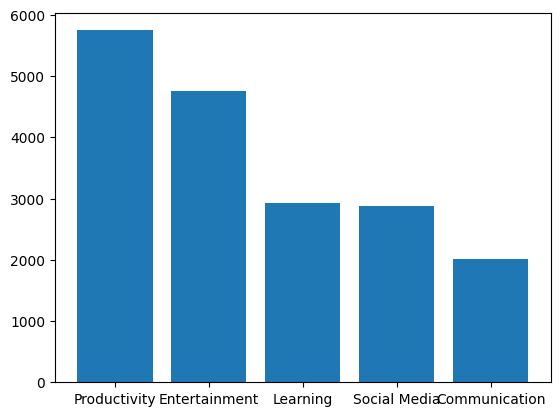

In [ ]:
#Save and Export Results
# --------------------------------

import os

output_folder = 'screen_time_outputs'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save datasets
df.to_csv(f'{output_folder}/complete_screen_time_data.csv', index=False)

daily_summary = df.groupby(['date','day_of_week']).agg({'minutes':'sum','hours':'sum'}).reset_index()
daily_summary.to_csv(f'{output_folder}/daily_summary.csv', index=False)

category_summary = df.groupby('category').agg({'minutes':['sum','mean','count'],'hours':'sum'}).round(2)
category_summary.to_csv(f'{output_folder}/category_summary.csv')

# Optional: save one chart
plt.bar(category_totals.index, category_totals.values)
plt.savefig(f'{output_folder}/category_barchart.png', dpi=300)

In [ ]:
# if you dont see the download option then This will create a file in your Colab workspace.

import shutil

# Zip the folder
shutil.make_archive('screen_time_outputs', 'zip', 'screen_time_outputs')
print("✅ Folder zipped successfully!")


✅ Folder zipped successfully!


In [ ]:
from google.colab import files

# Download the zip
files.download('screen_time_outputs.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>